# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [90]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [91]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [92]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [93]:
# slice the dataframe by housing_units
housing_units=sfo_data.loc[:, 'housing_units']
housing_units.head()

year
2010    372560
2010    372560
2010    372560
2010    372560
2010    372560
Name: housing_units, dtype: int64

In [94]:
# Save the dataframe as a csv file
housing_units.to_csv('housing_units.csv', index=True, header=['housing_units'])

In [314]:
# Calculate the mean number of housing units per year (hint: use groupby) 
units_per_year = housing_units.groupby(['year']).mean()
units_per_year.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

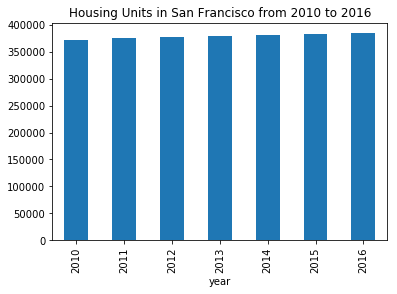

In [307]:
# plot the number of housing units per year (default)
default_plot=units_per_year.plot(kind='bar', title='Housing Units in San Francisco from 2010 to 2016') 

In [97]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
## Calculate the min number of housing units per year
units_per_year.groupby(['year']).min()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [98]:
## Calculate the max number of housing units per year
units_per_year.groupby(['year']).max()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [99]:
## Calculate the standard diviation of housing units per year
units_per_year.groupby(['year']).std()

year
2010   NaN
2011   NaN
2012   NaN
2013   NaN
2014   NaN
2015   NaN
2016   NaN
Name: housing_units, dtype: float64

(370000, 387500)

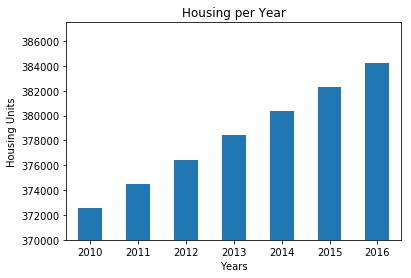

In [100]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
formatted_plot=plot_units_per_year=units_per_year.plot(kind='bar', title='Housing per Year',  x='Years', y='Housing Units', rot=0)
formatted_plot.set_xlabel("Years")
formatted_plot.set_ylabel("Housing Units")
formatted_plot.set_ylim(370000,387500)
                                            

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [101]:
# Calculate the average sale price per square foot and average gross rent
## slice the dateframe for the calculation
ave_price_rent=sfo_data.drop(columns=['neighborhood', 'housing_units'])
ave_price_rent.head()


,sale_price_sqr_foot,gross_rent
year,,
2010,291.182945,1239
2010,267.932583,1239
2010,170.098665,1239
2010,347.394919,1239
2010,319.027623,1239


In [102]:
## Calculate the average sale price per square foot and average gross rent
ave_price_rent_year = ave_price_rent.groupby(['year']).mean()
ave_price_rent_year

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


Text(0, 0.5, 'Average Gross Rent')

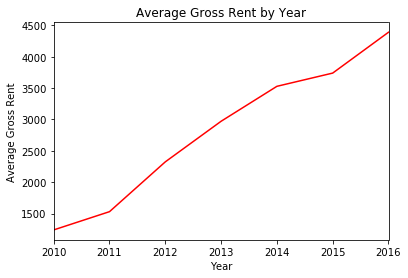

In [103]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average montly rent
average_gross_rent=ave_price_rent_year.plot(y="gross_rent", color="red", legend=False, title='Average Gross Rent by Year')
average_gross_rent.set_xlabel("Year")
average_gross_rent.set_ylabel("Average Gross Rent")

Text(0, 0.5, 'Price per SqFt')

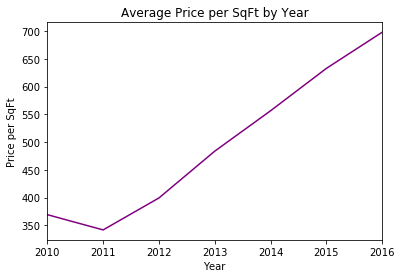

In [104]:
# Line chart for average sale price per square foot
average_price_sqr=ave_price_rent_year.plot(y="sale_price_sqr_foot", color="purple", legend=False, title='Average Price per SqFt by Year')
average_price_sqr.set_xlabel("Year")
average_price_sqr.set_ylabel("Price per SqFt")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [105]:
ave_price_sqr_by_neighborhood=sfo_data.groupby(['year','neighborhood'] ).mean()
ave_price_sqr_by_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [106]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
ave_price_sqr_by_neighborhood.hvplot.line(x='year', y='sale_price_sqr_foot', 
                groupby='neighborhood', xlabel='Year', ylabel='Ave. Sale Price per SqFt')


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [107]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
ave_price_sqr_by_neighborhood.hvplot.line(x='year', y='gross_rent', 
                groupby='neighborhood', xlabel='Year', ylabel='Ave. Gross Rent per Year')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [108]:
# group by neighborfood and sort by higher average sale_price_sqr_foot
expensive=sfo_data.groupby('neighborhood').mean()
sorted_expensive=expensive.sort_values(by=['sale_price_sqr_foot'], ascending=False)
sorted_expensive.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000


In [111]:
# slice top 10 expensive neighborfoods
top_ten=sorted_expensive.iloc[0:10]
top_ten

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [311]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot', 
                   title='Top 10 Expensive Neighborhoods in SFO', xlabel='Neighborfood', ylabel='Ave. Sale Price per SqFt'
                  ,rot=90, height=500)


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [113]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
ave_price_sqr_by_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [114]:
# Plotting the data
ave_price_sqr_by_neighborhood.hvplot.bar(x='year', y=['gross_rent', 'sale_price_sqr_foot'], 
                                         groupby='neighborhood', height=500, width=700, rot=90)


:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [115]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!
# Read the census data into a Pandas DataFrame
coordinates_file_path = Path("Data/neighborhoods_coordinates.csv")
coordiates_data = pd.read_csv(coordinates_file_path)
index_coordiates_data=coordiates_data.set_index('Neighborhood')
index_coordiates_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [116]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE
average=sfo_data.groupby('neighborhood').mean()
reset_average= average.reset_index()
reset_average.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [117]:
#update Column name
renamed_average=reset_average.rename(columns={"neighborhood":"Neighborhood"})
index_renamed_average=renamed_average.set_index('Neighborhood')
index_renamed_average.head()

,sale_price_sqr_foot,housing_units,gross_rent
Neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [118]:
# Join the average values with the neighborhood locations
combined_coordin_average=pd.concat([index_coordiates_data, index_renamed_average], axis="columns", join='inner')
combined_coordin_average.head()

,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Neighborhood,,,,,
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

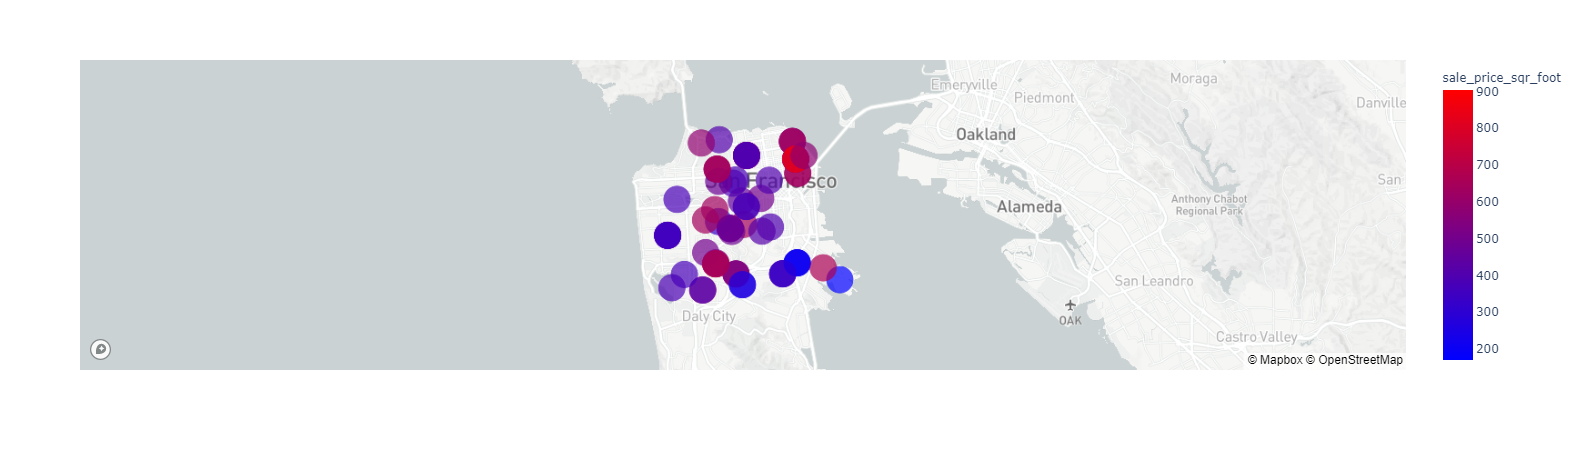

In [316]:
# Set the mapbox access token
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_sales_price = px.scatter_mapbox(
    combined_coordin_average,
    lat="Lat",
    lon="Lon",
    color="sale_price_sqr_foot",
    size="housing_units",
    zoom=10,
    color_continuous_scale=px.colors.sequential.Bluered,
)
map_sales_price.show()


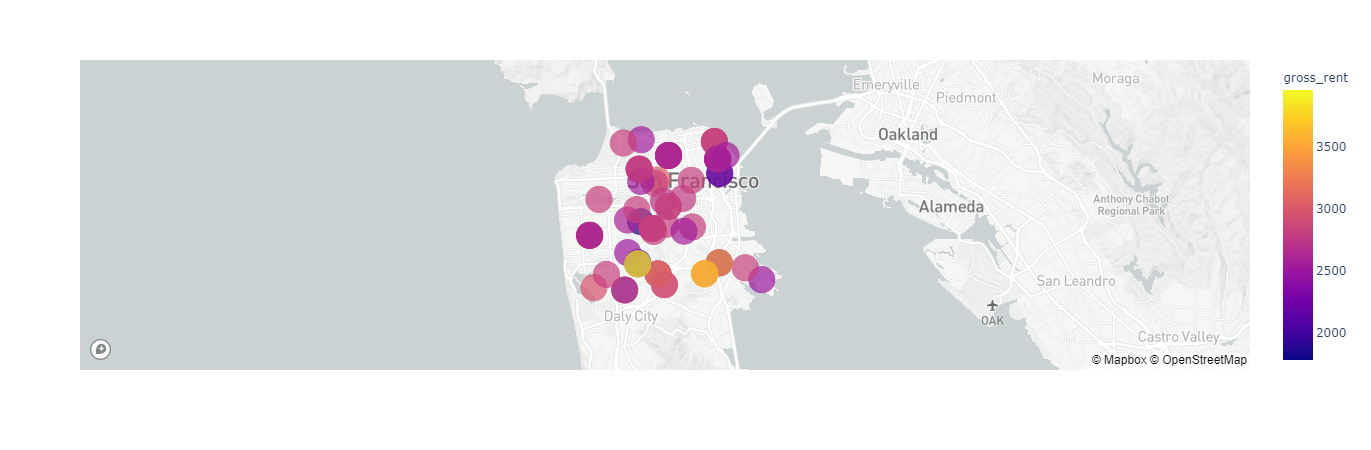

In [120]:
# Create a scatter mapbox by Gross Rent
map_rent = px.scatter_mapbox(
    combined_coordin_average,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    zoom=10,
    size="housing_units",
    color_continuous_scale=px.colors.sequential.Plasma,
)
map_rent.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [122]:
# Fetch the data from all expensive neighborhoods per year.
top_ten

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [123]:
# Prepare top_ten daaframe for parallel categories
top_ten_index=top_ten.reset_index()
top_ten_index

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


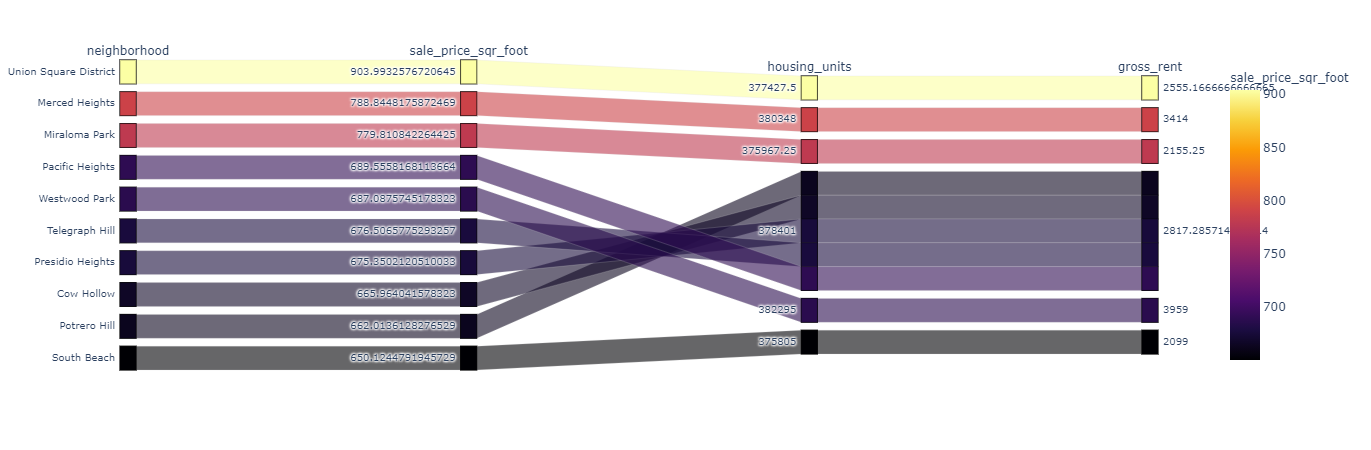

In [124]:
# Parallel Categories Plot
px.parallel_categories(top_ten_index,
                       dimensions=['neighborhood','sale_price_sqr_foot','housing_units', 'gross_rent'], 
                       color='sale_price_sqr_foot',
                       color_continuous_scale=px.colors.sequential.Inferno)

In [151]:
# Prepare top_ten dataframe for parallel coordinates
pd.options.display.float_format = '{:,.2f}'.format
top_ten_coordinates=top_ten_index.drop(columns=['neighborhood'])
top_ten_coordinates

,sale_price_sqr_foot,housing_units,gross_rent
0,903.99,"377,427.50","2,555.17"
1,788.84,"380,348.00","3,414.00"
2,779.81,"375,967.25","2,155.25"
3,689.56,"378,401.00","2,817.29"
4,687.09,"382,295.00","3,959.00"
5,676.51,"378,401.00","2,817.29"
6,675.35,"378,401.00","2,817.29"
7,665.96,"378,401.00","2,817.29"
8,662.01,"378,401.00","2,817.29"
9,650.12,"375,805.00","2,099.00"


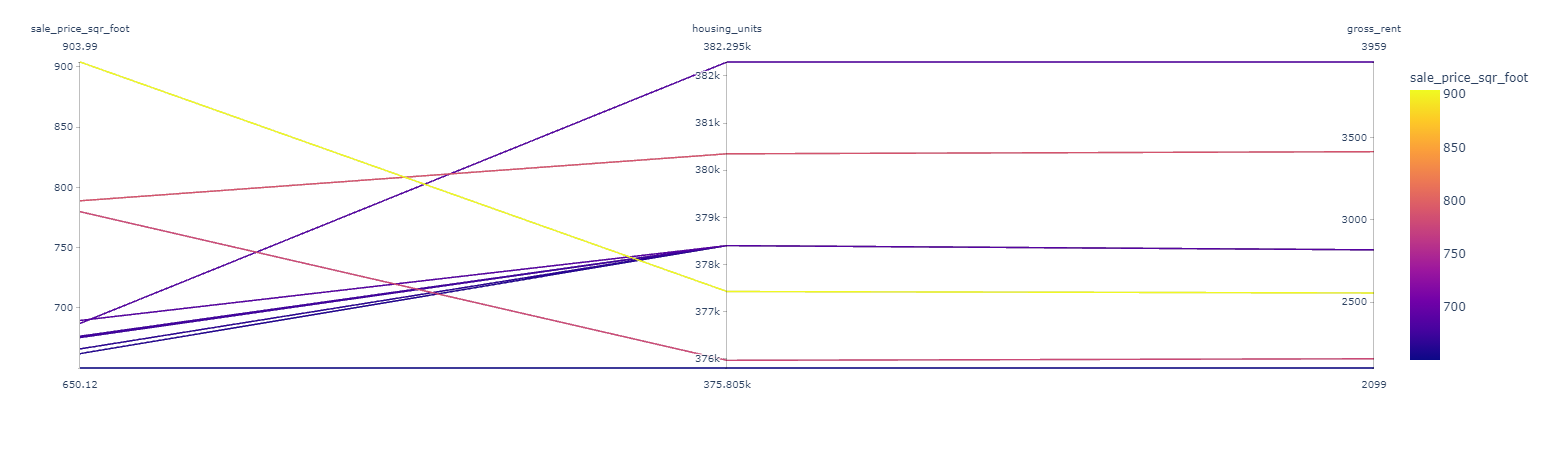

In [152]:
# Parallel Coordinates Plot
px.parallel_coordinates(top_ten_coordinates, color='sale_price_sqr_foot')

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [293]:
# prepare the dataframe for Sunburst Plot, select top 10 expensive neighborfood in each year
ave_price_sqr_by_neighborhood=sfo_data.groupby(['year','neighborhood'] ).mean()
ave_price_sqr_by_neighborhood
sorted_df_sunburst=ave_price_sqr_by_neighborhood.sort_values(by=['year', 'sale_price_sqr_foot'], ascending=False).groupby('year').head(10)
sorted_df_sunburst.reset_index(inplace=True)
sorted_df_sunburst

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2016,Presidio Heights,"1,465.97",384242,4390
1,2016,Merced Heights,"1,416.67",384242,4390
2,2016,Parnassus/Ashbury Heights,"1,208.00",384242,4390
3,2016,Outer Richmond,"1,196.65",384242,4390
4,2016,Cow Hollow,"1,059.07",384242,4390
5,2016,Eureka Valley/Dolores Heights,"1,026.79",384242,4390
6,2016,Russian Hill,"1,024.34",384242,4390
7,2016,Pacific Heights,996.39,384242,4390
8,2016,Bernal Heights,986.84,384242,4390
9,2016,Twin Peaks,970.09,384242,4390


In [294]:
# to check the datatypes
sorted_df_sunburst.dtypes

year                     int64
neighborhood            object
sale_price_sqr_foot    float64
housing_units            int64
gross_rent               int64
dtype: object

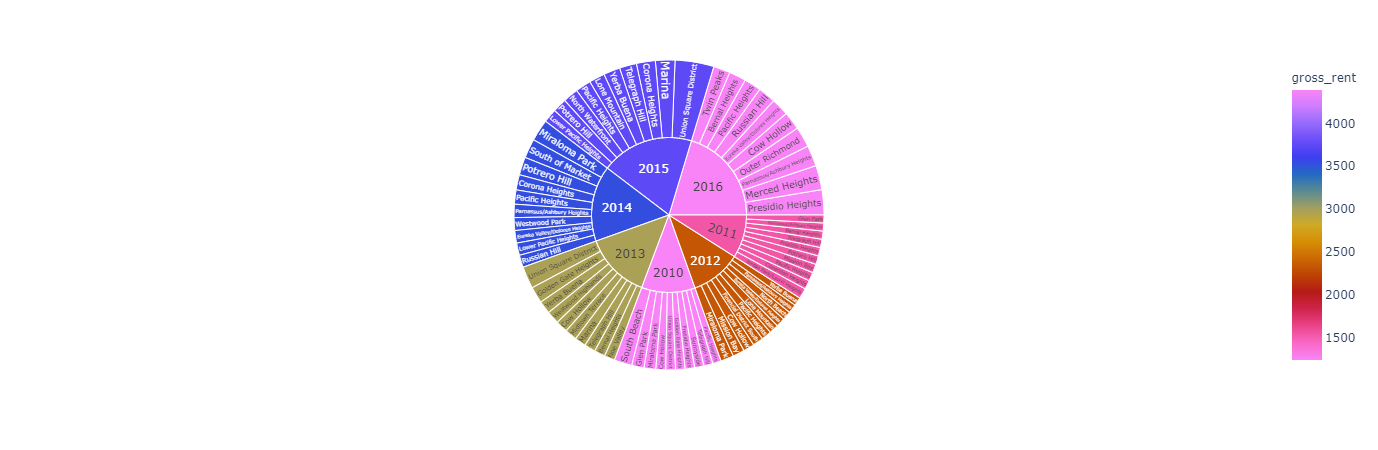

In [306]:
# Sunburst Plot
plot =px.sunburst(sorted_df_sunburst,
                 path=['year','neighborhood'], 
                 values='sale_price_sqr_foot', 
                 color='gross_rent',
                 color_continuous_scale ='mrybm')
plot.show()